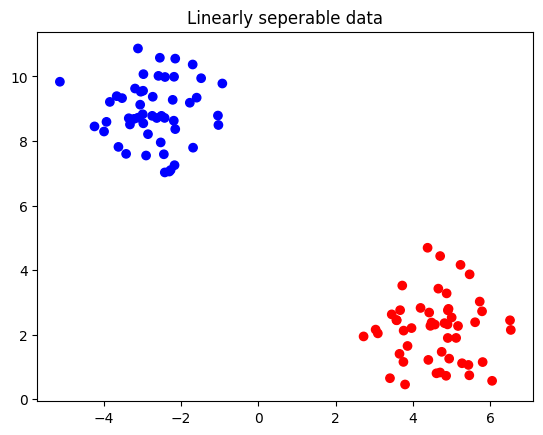

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=100,centers=2, random_state=42, cluster_std=1.0)
y=np.where(y == 0, -1 , 1)
#Convert labels from {0,1} to {-1,1}
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.title("Linearly seperable data")
plt.show()

In [2]:
from sklearn.svm import SVC
svm_hard = SVC(kernel='linear',C=1e6)
svm_hard.fit(X,y)
print("Number of support vectors:",len(svm_hard.support_vectors_))

w=svm_hard.coef_[0]
b=svm_hard.intercept_[0]

print("w: ",w)
print("b: ",b)

Number of support vectors: 2
w:  [ 0.24748994 -0.17407192]
b:  0.7341550476191021


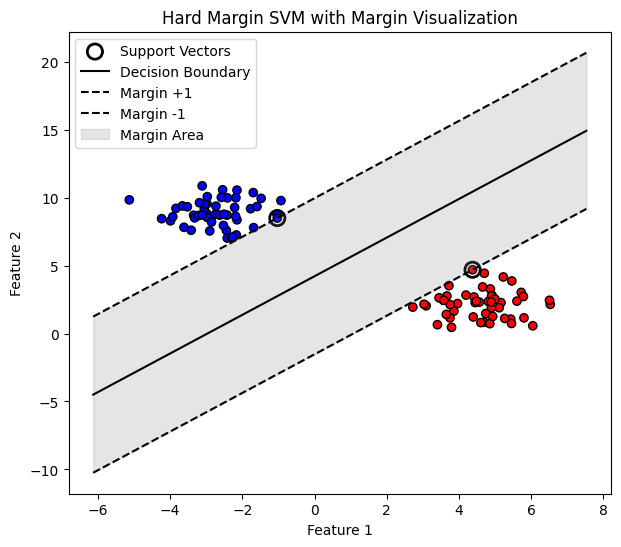

In [4]:
plt.figure(figsize=(7,6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:,0],
    svm_hard.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='k', linewidth=2,
    label='Support Vectors'
)

# Create X values for line plotting
x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w[0] * x_vals + b) / w[1]

# Margin boundaries: w.x + b = +-1
y_margin_pos = -(w[0] * x_vals + b - 1) / w[1]
y_margin_neg = -(w[0] * x_vals + b +1 ) / w[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label = "Decision Boundary")
plt.plot(x_vals, y_margin_pos, 'k--', label = "Margin +1")
plt.plot(x_vals, y_margin_neg, 'k--', label = "Margin -1")

# Shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
    color='gray', alpha=0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hard Margin SVM with Margin Visualization")
plt.legend()
plt.show()

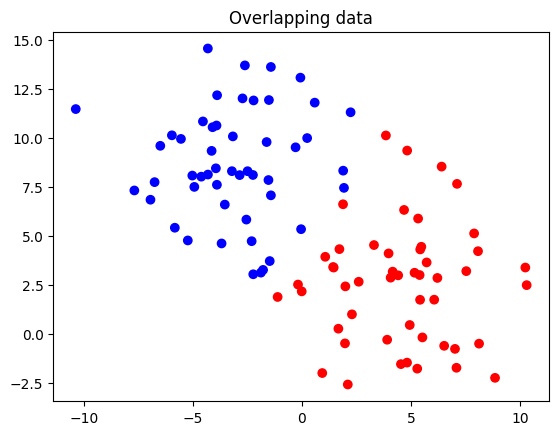

In [5]:
X_overlap, y_overlap = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=3)
y_overlap=np.where(y_overlap==0,-1,1)

plt.scatter(X_overlap[:,0], X_overlap[:,1], c=y_overlap, cmap="bwr")
plt.title("Overlapping data")
plt.show()

In [6]:
from sklearn.svm import SVC

#Hard Margin SVM(very large C)
svm_hard = SVC(kernel='linear',C=1e6)
svm_hard.fit(X_overlap,y_overlap)
print("Number of support vectors:",
      len(svm_hard.support_vectors_))

Number of support vectors: 3


In [7]:
w=svm_hard.coef_[0]
b=svm_hard.intercept_[0]

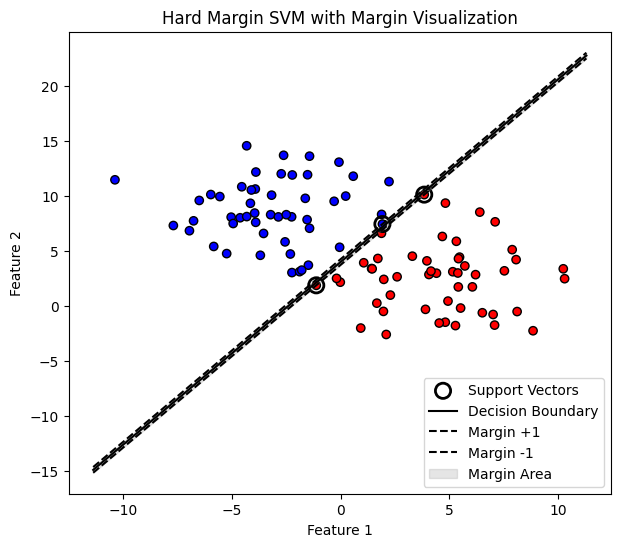

In [8]:
plt.figure(figsize=(7,6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1],
             c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:,0],
    svm_hard.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='k', linewidth=2,
    label='Support Vectors'
)

# Create X values for line plotting
x_vals = np.linspace(X_overlap[:,0].min()-1, X_overlap[:,0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w[0] * x_vals + b) / w[1]

# Margin boundaries: w.x + b = +-1
y_margin_pos = -(w[0] * x_vals + b - 1) / w[1]
y_margin_neg = -(w[0] * x_vals + b +1 ) / w[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label = "Decision Boundary")
plt.plot(x_vals, y_margin_pos, 'k--', label = "Margin +1")
plt.plot(x_vals, y_margin_neg, 'k--', label = "Margin -1")

# Shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
    color='gray', alpha=0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hard Margin SVM with Margin Visualization")
plt.legend()
plt.show()

In [9]:
#part 4 soft margin

In [10]:
from sklearn.svm import SVC

#Soft margin SVM
svm_soft = SVC(kernel='linear',C=1.0)
svm_soft.fit(X_overlap,y_overlap)

print("Number of support vectors:",
      len(svm_soft.support_vectors_))

Number of support vectors: 6


In [11]:
#plot soft margin decision boundary

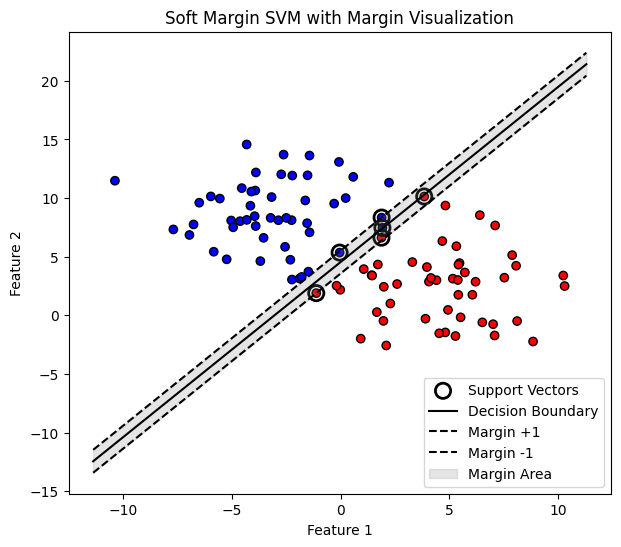

In [15]:
w_soft = svm_soft.coef_[0]
b_soft=svm_soft.intercept_[0]
plt.figure(figsize=(7,6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1],
             c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_soft.support_vectors_[:,0],
    svm_soft.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='k', linewidth=2,
    label='Support Vectors'
)

# Create X values for line plotting
x_vals = np.linspace(X_overlap[:,0].min()-1, X_overlap[:,0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w_soft[0] * x_vals + b_soft) / w_soft[1]

# Margin boundaries: w.x + b = +-1
y_margin_pos = -(w_soft[0] * x_vals + b_soft - 1) / w_soft[1]
y_margin_neg = -(w_soft[0] * x_vals + b_soft +1 ) / w_soft[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label = "Decision Boundary")
plt.plot(x_vals, y_margin_pos, 'k--', label = "Margin +1")
plt.plot(x_vals, y_margin_neg, 'k--', label = "Margin -1")

# Shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
    color='gray', alpha=0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Soft Margin SVM with Margin Visualization")
plt.legend()
plt.show()

Number of support vectors: 26


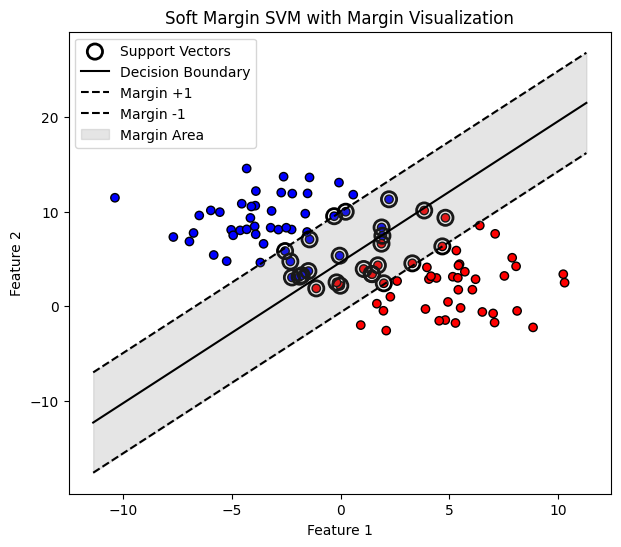

In [18]:
from sklearn.svm import SVC

#Soft margin SVM
svm_soft = SVC(kernel='linear',C=0.01)
svm_soft.fit(X_overlap,y_overlap)

print("Number of support vectors:",
      len(svm_soft.support_vectors_))
w_soft = svm_soft.coef_[0]
b_soft=svm_soft.intercept_[0]
plt.figure(figsize=(7,6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1],
             c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_soft.support_vectors_[:,0],
    svm_soft.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='k', linewidth=2,
    label='Support Vectors'
)

# Create X values for line plotting
x_vals = np.linspace(X_overlap[:,0].min()-1, X_overlap[:,0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w_soft[0] * x_vals + b_soft) / w_soft[1]

# Margin boundaries: w.x + b = +-1
y_margin_pos = -(w_soft[0] * x_vals + b_soft - 1) / w_soft[1]
y_margin_neg = -(w_soft[0] * x_vals + b_soft +1 ) / w_soft[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label = "Decision Boundary")
plt.plot(x_vals, y_margin_pos, 'k--', label = "Margin +1")
plt.plot(x_vals, y_margin_neg, 'k--', label = "Margin -1")

# Shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
    color='gray', alpha=0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Soft Margin SVM with Margin Visualization")
plt.legend()
plt.show()

Number of support vectors: 60


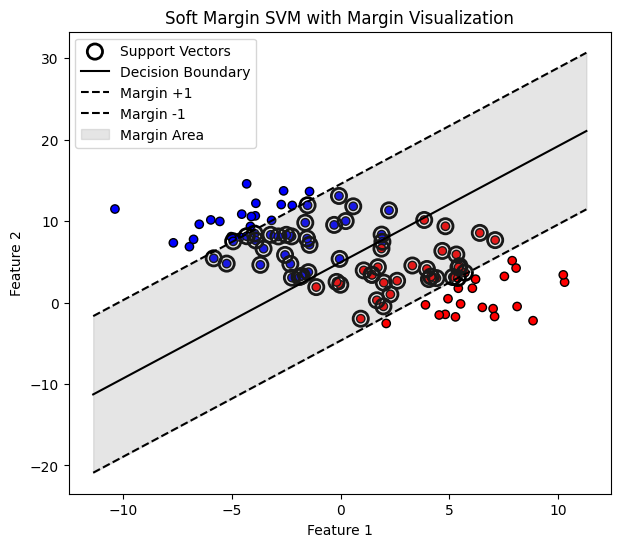

In [19]:
from sklearn.svm import SVC

#Soft margin SVM
svm_soft = SVC(kernel='linear',C=0.001)
svm_soft.fit(X_overlap,y_overlap)

print("Number of support vectors:",
      len(svm_soft.support_vectors_))
w_soft = svm_soft.coef_[0]
b_soft=svm_soft.intercept_[0]
plt.figure(figsize=(7,6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1],
             c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_soft.support_vectors_[:,0],
    svm_soft.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='k', linewidth=2,
    label='Support Vectors'
)

# Create X values for line plotting
x_vals = np.linspace(X_overlap[:,0].min()-1, X_overlap[:,0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w_soft[0] * x_vals + b_soft) / w_soft[1]

# Margin boundaries: w.x + b = +-1
y_margin_pos = -(w_soft[0] * x_vals + b_soft - 1) / w_soft[1]
y_margin_neg = -(w_soft[0] * x_vals + b_soft +1 ) / w_soft[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label = "Decision Boundary")
plt.plot(x_vals, y_margin_pos, 'k--', label = "Margin +1")
plt.plot(x_vals, y_margin_neg, 'k--', label = "Margin -1")

# Shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
    color='gray', alpha=0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Soft Margin SVM with Margin Visualization")
plt.legend()
plt.show()

Number of support vectors: 3


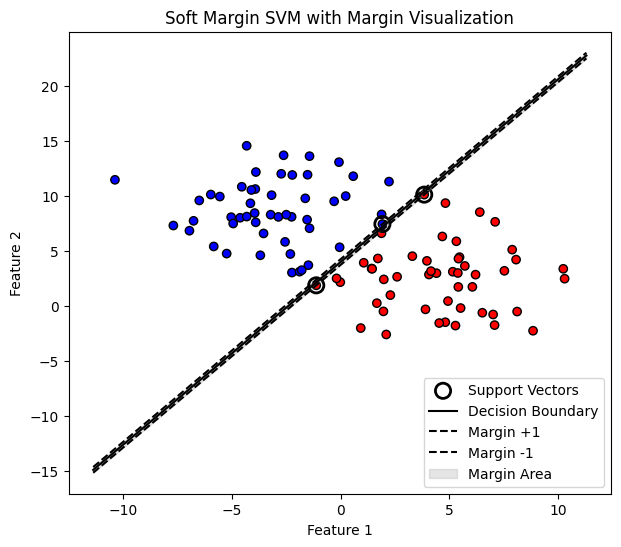

In [20]:
from sklearn.svm import SVC

#Soft margin SVM
svm_soft = SVC(kernel='linear',C=1000.0)
svm_soft.fit(X_overlap,y_overlap)

print("Number of support vectors:",
      len(svm_soft.support_vectors_))
w_soft = svm_soft.coef_[0]
b_soft=svm_soft.intercept_[0]
plt.figure(figsize=(7,6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1],
             c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_soft.support_vectors_[:,0],
    svm_soft.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='k', linewidth=2,
    label='Support Vectors'
)

# Create X values for line plotting
x_vals = np.linspace(X_overlap[:,0].min()-1, X_overlap[:,0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w_soft[0] * x_vals + b_soft) / w_soft[1]

# Margin boundaries: w.x + b = +-1
y_margin_pos = -(w_soft[0] * x_vals + b_soft - 1) / w_soft[1]
y_margin_neg = -(w_soft[0] * x_vals + b_soft +1 ) / w_soft[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label = "Decision Boundary")
plt.plot(x_vals, y_margin_pos, 'k--', label = "Margin +1")
plt.plot(x_vals, y_margin_neg, 'k--', label = "Margin -1")

# Shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
    color='gray', alpha=0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Soft Margin SVM with Margin Visualization")
plt.legend()
plt.show()

Number of support vectors: 3


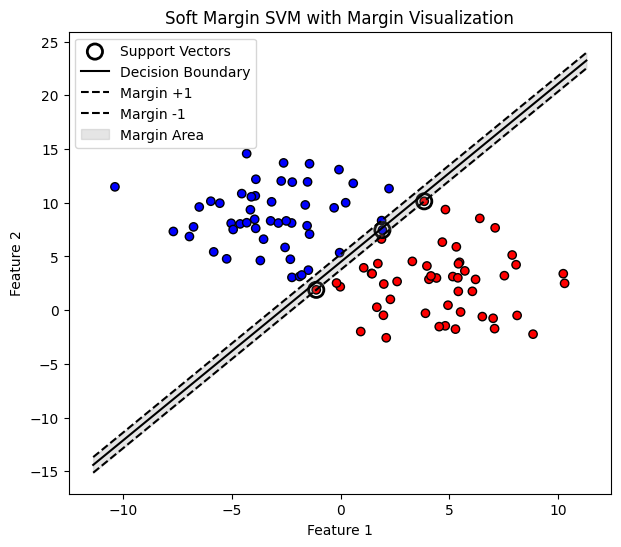

In [21]:
from sklearn.svm import SVC

#Soft margin SVM
svm_soft = SVC(kernel='linear',C=10.0)
svm_soft.fit(X_overlap,y_overlap)

print("Number of support vectors:",
      len(svm_soft.support_vectors_))
w_soft = svm_soft.coef_[0]
b_soft=svm_soft.intercept_[0]
plt.figure(figsize=(7,6))

# Plot data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1],
             c=y_overlap, cmap='bwr', edgecolors='k')

# Highlight support vectors
plt.scatter(
    svm_soft.support_vectors_[:,0],
    svm_soft.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='k', linewidth=2,
    label='Support Vectors'
)

# Create X values for line plotting
x_vals = np.linspace(X_overlap[:,0].min()-1, X_overlap[:,0].max()+1, 200)

# Decision boundary: w.x + b = 0
y_decision = -(w_soft[0] * x_vals + b_soft) / w_soft[1]

# Margin boundaries: w.x + b = +-1
y_margin_pos = -(w_soft[0] * x_vals + b_soft - 1) / w_soft[1]
y_margin_neg = -(w_soft[0] * x_vals + b_soft +1 ) / w_soft[1]

# Plot lines
plt.plot(x_vals, y_decision, 'k-', label = "Decision Boundary")
plt.plot(x_vals, y_margin_pos, 'k--', label = "Margin +1")
plt.plot(x_vals, y_margin_neg, 'k--', label = "Margin -1")

# Shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
    color='gray', alpha=0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Soft Margin SVM with Margin Visualization")
plt.legend()
plt.show()